In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
!ls

'NFL Gambling Modeling.ipynb'		 nfl_teams.csv	 spreadspoke_scores.csv
'NFL Gambling Pre-Modeling Work.ipynb'	 pi.csv		 Untitled.ipynb
 nfl_stadiums.csv			 spreadspoke.R


In [3]:
!ls../

/bin/bash: line 1: ls../: No such file or directory


In [4]:
!ls ../Cooper

'All the data preparations.ipynb'   final_nfl_data.csv
 cleaned_nfl_data.csv		   'Final Notebook.ipynb'


In [5]:
df = pd.read_csv('../Cooper/final_nfl_data.csv')
#df_1 = pd.read_csv('../Tom/pi.csv')

In [7]:
df.drop(columns='Unnamed: 0', inplace=True)

In [8]:
df

,spread_favorite,over_under_line,favorite_win,favorite_home,fav_elev_change,fav_temp_dif,fav_humidity_diff,fav_wind_diff,fav_rank_diff
0,-3.0,44.5,True,True,0.00,0.000000,0.00,0.000000,1.0
1,-3.0,38.0,True,False,-174.10,8.272727,14.84,8.060606,3.0
2,-2.5,38.5,True,True,0.00,0.000000,0.00,0.000000,-10.0
3,-11.0,46.0,True,True,0.00,0.000000,0.00,0.000000,21.0
4,-3.0,44.5,True,False,-317.64,-7.338028,11.75,18.366197,5.0
...,...,...,...,...,...,...,...,...,...
4716,-4.0,48.5,False,True,0.00,0.000000,0.00,0.000000,13.0
4717,-2.5,54.0,True,True,0.00,0.000000,0.00,0.000000,1.0
4718,-3.0,48.0,False,True,0.00,0.000000,0.00,0.000000,9.0
4719,-7.0,54.5,False,True,0.00,0.000000,0.00,0.000000,26.0


9.220703125

In [90]:
X = df.drop(columns='favorite_win')
y = df['favorite_win']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=520, random_state=42)


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4201 entries, 2876 to 860
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   spread_favorite    4201 non-null   float64
 1   over_under_line    4201 non-null   float64
 2   favorite_home      4201 non-null   bool   
 3   fav_elev_change    4201 non-null   float64
 4   fav_temp_dif       4201 non-null   float64
 5   fav_humidity_diff  4201 non-null   float64
 6   fav_wind_diff      4201 non-null   float64
 7   fav_rank_diff      4201 non-null   float64
dtypes: bool(1), float64(7)
memory usage: 266.7 KB


In [39]:
X_train.describe()

,spread_favorite,over_under_line,fav_elev_change,fav_temp_dif,fav_humidity_diff,fav_wind_diff,fav_rank_diff
count,4201.000000,4201.000000,4201.000000,4201.000000,4201.000000,4201.000000,4201.000000
mean,-5.524518,44.212806,-11.077629,1.079728,-5.630246,-0.356491,4.855987
std,3.480181,4.858479,250.089457,10.010158,20.018399,3.695825,11.874762
min,-26.500000,30.000000,-1610.200000,-67.797872,-83.576923,-12.866667,-31.000000
25%,-7.000000,41.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
50%,-4.500000,44.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,-3.000000,47.500000,0.000000,0.000000,0.000000,0.000000,14.000000
max,-1.000000,63.500000,1609.100000,49.946667,48.555556,22.907407,31.000000


In [40]:
train_df = X_train.copy()
train_df['favorite_win'] = y_train

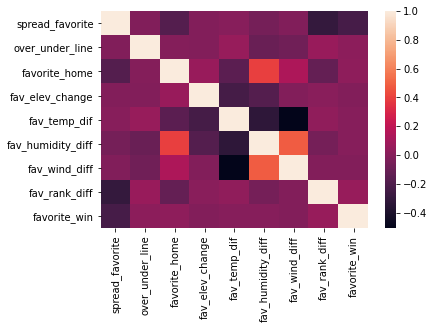

In [41]:
sns.heatmap(train_df.corr());

In [42]:
list(X_train)

['spread_favorite',
 'over_under_line',
 'favorite_home',
 'fav_elev_change',
 'fav_temp_dif',
 'fav_humidity_diff',
 'fav_wind_diff',
 'fav_rank_diff']

In [43]:
num_columns = list(X_train)

In [47]:
num_transformer = StandardScaler()

preprocessor = ColumnTransformer([ 
    ('nums', num_transformer, num_columns)
])

# Model-less Baseline

In [48]:
pd.Series(y_train).value_counts(normalize=True)

True     0.662699
False    0.337301
Name: favorite_win, dtype: float64

# Decision Tree

In [49]:
clf_dt = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=15))
])

clf_dt.fit(X_train, y_train)

train_preds = clf_dt.predict(X_train)
test_preds = clf_dt.predict(X_test)

train_probas = clf_dt.predict_proba(X_train)[:,1]
test_probas = clf_dt.predict_proba(X_test)[:,1]

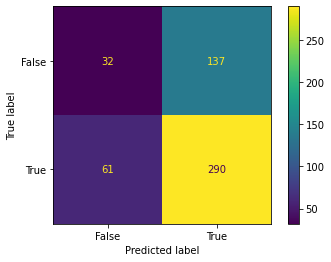

In [50]:
plot_confusion_matrix(clf_dt, X_test, y_test);

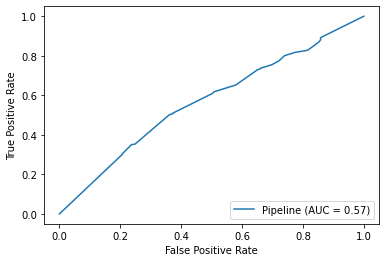

In [51]:
plot_roc_curve(clf_dt, X_test, y_test);

In [52]:
print(f"Train F1: {f1_score(y_train, train_preds):.4f}")
print(f"Train Precision: {precision_score(y_train, train_preds):.4f}")
print(f"Train ROC-AUC: {roc_auc_score(y_train, train_preds):.4f}")
print("*" * 20)
print(f"Test F1: {f1_score(y_test, test_preds):.4f}")
print(f"Test Precision: {precision_score(y_test, test_preds):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, test_preds):.4f}")

Train F1: 0.8582
Train Precision: 0.7733
Train ROC-AUC: 0.7043
********************
Test F1: 0.7455
Test Precision: 0.6792
Test ROC-AUC: 0.5078


In [53]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_preds):.4f}")
    print("*" * 20)
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_preds):.4f}")

Train F1: 0.8582
Train Precision: 0.7733
Train ROC-AUC: 0.7043
********************
Test F1: 0.7455
Test Precision: 0.6792
Test ROC-AUC: 0.5078


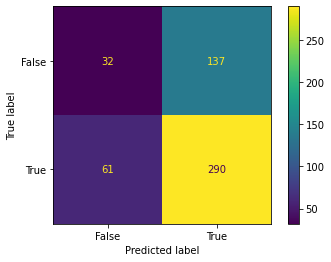

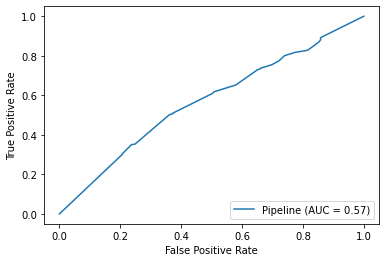

In [55]:
evaluate(clf_dt, X_train, X_test, y_train, y_test)

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [65]:
ada = AdaBoostClassifier(random_state=42, learning_rate=.1, n_estimators=100)

ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [66]:
print(f"Train Score: {ada.score(X_train, y_train)}")
print(f"Test Score: {ada.score(X_test, y_test)}")

Train Score: 0.6646036657938587
Test Score: 0.6730769230769231


In [67]:
ada = AdaBoostClassifier(random_state = 65)

# Let's define a param grid together!
param_grid = {
        'learning_rate': [.01, .1, .5, 1],
        'n_estimators': [10, 50, 100, 1000]
}

# Create our grid search
gs = GridSearchCV(estimator=ada, param_grid=param_grid, cv = 5)

# Fit our grid search
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=65),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [10, 50, 100, 1000]})

In [68]:
print(f"Train Score: {gs.best_estimator_.score(X_train, y_train)}")
print(f"Test Score: {gs.best_estimator_.score(X_test, y_test)}")

Train Score: 0.6626993572958819
Test Score: 0.675


In [69]:
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 10}

# Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB

In [57]:
clf_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('nb', GaussianNB())
])

clf_nb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nums', StandardScaler(),
                                                  ['spread_favorite',
                                                   'over_under_line',
                                                   'favorite_home',
                                                   'fav_elev_change',
                                                   'fav_temp_dif',
                                                   'fav_humidity_diff',
                                                   'fav_wind_diff',
                                                   'fav_rank_diff'])])),
                ('nb', GaussianNB())])

Train F1: 0.7685
Train Precision: 0.6675
Train ROC-AUC: 0.5096
********************
Test F1: 0.7785
Test Precision: 0.6824
Test ROC-AUC: 0.5151


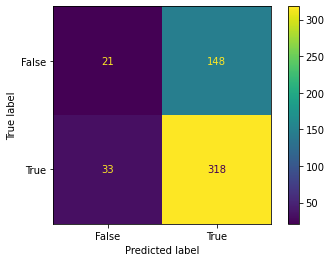

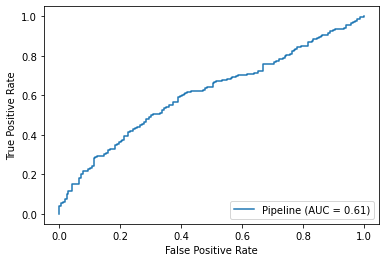

In [59]:
evaluate(clf_nb, X_train, X_test, y_train, y_test)

# Logreg

In [70]:
clf_lr = Pipeline(steps = [
    
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])
clf_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nums', StandardScaler(),
                                                  ['spread_favorite',
                                                   'over_under_line',
                                                   'favorite_home',
                                                   'fav_elev_change',
                                                   'fav_temp_dif',
                                                   'fav_humidity_diff',
                                                   'fav_wind_diff',
                                                   'fav_rank_diff'])])),
                ('logreg', LogisticRegression())])

Train F1: 0.7910
Train Precision: 0.6678
Train ROC-AUC: 0.5110
********************
Test F1: 0.7938
Test Precision: 0.6795
Test ROC-AUC: 0.5098


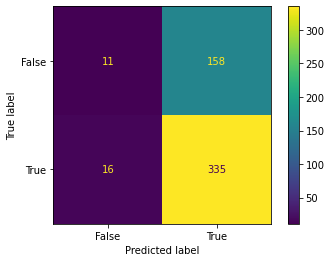

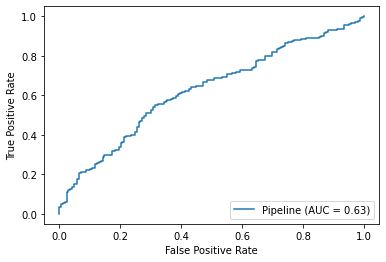

In [71]:
evaluate(clf_lr, X_train, X_test, y_train, y_test)

# DT Exploration

In [72]:
clf_dt = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=15))
])

clf_dt.fit(X_train, y_train)

train_preds = clf_dt.predict(X_train)
test_preds = clf_dt.predict(X_test)

train_probas = clf_dt.predict_proba(X_train)[:,1]
test_probas = clf_dt.predict_proba(X_test)[:,1]

In [73]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_preds):.4f}")
    print("*" * 20)
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_preds):.4f}")

Train F1: 0.8582
Train Precision: 0.7733
Train ROC-AUC: 0.7043
********************
Test F1: 0.7455
Test Precision: 0.6792
Test ROC-AUC: 0.5078


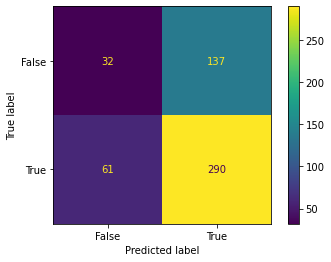

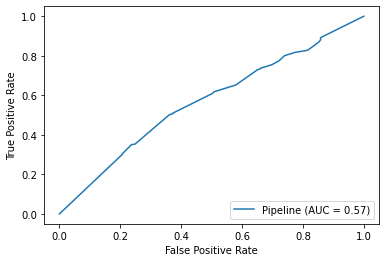

In [74]:
evaluate(clf_dt, X_train, X_test, y_train, y_test)

## Boosting Methods

### ADABoost

In [75]:
ada = AdaBoostClassifier(random_state = 65)

# Let's define a param grid together!
param_grid = {
        'learning_rate': [.001, .01, .05, .1,],
        'n_estimators': [2, 5, 10, 50]
}

# Create our grid search
gs = GridSearchCV(estimator=ada, param_grid=param_grid, cv = 5)

# Fit our grid search
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=65),
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'n_estimators': [2, 5, 10, 50]})

In [76]:
print(f"Train Score: {gs.best_estimator_.score(X_train, y_train)}")
print(f"Test Score: {gs.best_estimator_.score(X_test, y_test)}")

Train Score: 0.6626993572958819
Test Score: 0.675


In [77]:
gs.best_params_

{'learning_rate': 0.001, 'n_estimators': 2}

### Gradient Boost

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gb_sklearn = GradientBoostingClassifier(max_depth=2, n_estimators=10, random_state=42)

gb_sklearn.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=10, random_state=42)

In [86]:
param_grid = {
        'learning_rate': [.001, .01, .05, .1,],
        'n_estimators': [2, 5, 10, 50]
}

gs = GridSearchCV(estimator=gb_sklearn, param_grid=param_grid, cv = 5)

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=2, n_estimators=10,
                                                  random_state=42),
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'n_estimators': [2, 5, 10, 50]})

In [89]:
print(f"Train Score: {gs.score(X_train, y_train)}")
print(f"Test Score: {gs.score(X_test, y_test)}")

Train Score: 0.6626993572958819
Test Score: 0.675


In [88]:
gs.best_params_

{'learning_rate': 0.001, 'n_estimators': 2}